#  Applied Machine Learning 

## Homework 5: Evaluation metrics


## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

In [5]:
# # if disease  = 1 else no disease 0
# precision = TP/ TP + FP
# # MOdel A
# print("MODEL A: ")
# print()
# TP, FP, FN, TN = 2, 0, 8, 100
# precision_A = TP / (TP + FP)
# print(f"The precision value is {precision}")

# recall_A = TP/ (TP + FN)
# print(f"The recall value is {recall}")

# f1_score_A = 2 * (precision_A * recall_A)/ (precision_A + recall_A)
# print(f"The f1_score value is {f1_score_A}")



# # Model B
# print("MODEL B:")
# print()
# TP, FP, FN, TN = 6, 10, 4, 90
# precision_B = TP / (TP + FP)
# print(f"The precision value is {precision_B}")

# recall_B = TP/ (TP + FN)
# print(f"The recall value is {recall_B}")

# f1_score_B = 2 * (precision_B * recall_B)/ (precision_B + recall_B)
# print(f"The f1_score value is {f1_score_B}")



<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [6]:
results_dict = {"A": {}, "B": {}}

In [12]:
# results_dict["A"]["accuracy"] = (TP + TN) / (TP + TN + FP + FN)
# results_dict["B"]["accuracy"] = (TP + TN) / (TP + TN + FP + FN)

results_dict["A"]["accuracy"] = 100/250
results_dict["B"]["accuracy"] = 120/250

In [13]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [14]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [15]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.4,0.48


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [16]:
# results_dict["A"]["precision"] = precision_A
# results_dict["B"]["precision"] = precision_B
# results_dict["A"]["recall"] = recall_A
# results_dict["B"]["recall"] = recall_B
# results_dict["A"]["f1"] = f1_score_A
# results_dict["B"]["f1"] = f1_score_B

def f1_score(precision,recall):
    return (2 * precision * recall) / (precision + recall)

results_dict["A"]["precision"] = 158/250
results_dict["B"]["precision"] = 125/250
results_dict["A"]["recall"] = 15/55
results_dict["B"]["recall"] = 24/55
results_dict["A"]["f1"] = f1_score(results_dict["A"]["precision"], results_dict["A"]["recall"])
results_dict["B"]["f1"] = f1_score(results_dict["B"]["precision"], results_dict["B"]["recall"])




In [17]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [18]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [19]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [20]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [21]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

In [22]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

AssertionError: Your answer is incorrect, see traceback above.

Show the dataframe with all results. 

In [23]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.400000,0.480000
precision,0.632000,0.500000
recall,0.272727,0.436364
f1,0.381029,0.466019


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

url_1 = "https://www.kaggle.com/datasets/utkarshx27/affordable-housing-by-town-2011-2022?select=Affordable_Housing_by_Town_2011-2022.csv"

url_2 = "https://www.kaggle.com/datasets/utkarshx27/default-of-credit-card-clients-dataset?select=default+of+credit+card+clients.xls"

url_3 = 

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [24]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [25]:
train_df.shape

(2333, 21)

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 1402 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2333 non-null   object 
 1   account length          2333 non-null   int64  
 2   area code               2333 non-null   int64  
 3   phone number            2333 non-null   object 
 4   international plan      2333 non-null   object 
 5   voice mail plan         2333 non-null   object 
 6   number vmail messages   2333 non-null   int64  
 7   total day minutes       2333 non-null   float64
 8   total day calls         2333 non-null   int64  
 9   total day charge        2333 non-null   float64
 10  total eve minutes       2333 non-null   float64
 11  total eve calls         2333 non-null   int64  
 12  total eve charge        2333 non-null   float64
 13  total night minutes     2333 non-null   float64
 14  total night calls       2333 non-null

In [27]:
train_df['churn']=train_df['churn'].astype('int64')
train_df['churn'].value_counts(normalize=True)

0    0.850407
1    0.149593
Name: churn, dtype: float64

In [28]:
correlation = train_df.corr()
correlation

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.001182,-0.014392,0.004172,0.041893,0.004172,-0.007104,0.007933,-0.007079,-0.022323,-0.018192,-0.022311,0.012221,0.007324,0.012280,-0.006801,0.030816
area code,-0.001182,1.000000,-0.010420,-0.018004,-0.000605,-0.018000,0.008661,0.004977,0.008698,0.007058,0.038585,0.007019,-0.024145,-0.032345,-0.024228,0.025106,-0.007699
number vmail messages,-0.014392,-0.010420,1.000000,-0.011443,-0.001229,-0.011445,-0.006903,0.001281,-0.006877,-0.015654,0.005661,-0.015692,0.007540,0.005228,0.007516,0.000817,-0.079242
total day minutes,0.004172,-0.018004,-0.011443,1.000000,-0.005629,1.000000,0.023442,0.031951,0.023441,0.007811,0.015868,0.007758,-0.005937,-0.002756,-0.005812,-0.021350,0.215746
total day calls,0.041893,-0.000605,-0.001229,-0.005629,1.000000,-0.005626,-0.015018,0.009994,-0.015008,0.030066,-0.007456,0.030064,0.005074,0.005216,0.005156,-0.020813,0.016546
total day charge,0.004172,-0.018000,-0.011445,1.000000,-0.005626,1.000000,0.023457,0.031956,0.023456,0.007816,0.015864,0.007762,-0.005940,-0.002758,-0.005814,-0.021356,0.215749
total eve minutes,-0.007104,0.008661,-0.006903,0.023442,-0.015018,0.023457,1.000000,-0.000852,1.000000,-0.025507,0.013250,-0.025524,-0.007664,-0.008652,-0.007760,-0.026125,0.087715
total eve calls,0.007933,0.004977,0.001281,0.031951,0.009994,0.031956,-0.000852,1.000000,-0.000838,0.005060,0.002709,0.005108,0.013521,0.027803,0.013485,0.011812,0.024840
total eve charge,-0.007079,0.008698,-0.006877,0.023441,-0.015008,0.023456,1.000000,-0.000838,1.000000,-0.025504,0.013255,-0.025521,-0.007682,-0.008652,-0.007778,-0.026142,0.087705
total night minutes,-0.022323,0.007058,-0.015654,0.007811,0.030066,0.007816,-0.025507,0.005060,-0.025504,1.000000,0.006018,0.999999,-0.021817,-0.022329,-0.021844,-0.009440,0.026606


In [29]:
most_frequent=[
     "total day minutes",
    "total day charge",
    "total eve minutes",
    "total eve charge",
    "total intl minutes",
    "total intl charge",
    "customer service calls",
    "churn",
]

correlation_most = train_df[most_frequent].corr()
correlation_most

,total day minutes,total day charge,total eve minutes,total eve charge,total intl minutes,total intl charge,customer service calls,churn
total day minutes,1.000000,1.000000,0.023442,0.023441,-0.005937,-0.005812,-0.021350,0.215746
total day charge,1.000000,1.000000,0.023457,0.023456,-0.005940,-0.005814,-0.021356,0.215749
total eve minutes,0.023442,0.023457,1.000000,1.000000,-0.007664,-0.007760,-0.026125,0.087715
total eve charge,0.023441,0.023456,1.000000,1.000000,-0.007682,-0.007778,-0.026142,0.087705
total intl minutes,-0.005937,-0.005940,-0.007664,-0.007682,1.000000,0.999993,0.009233,0.064230
total intl charge,-0.005812,-0.005814,-0.007760,-0.007778,0.999993,1.000000,0.009153,0.064267
customer service calls,-0.021350,-0.021356,-0.026125,-0.026142,0.009233,0.009153,1.000000,0.216641
churn,0.215746,0.215749,0.087715,0.087705,0.064230,0.064267,0.216641,1.000000


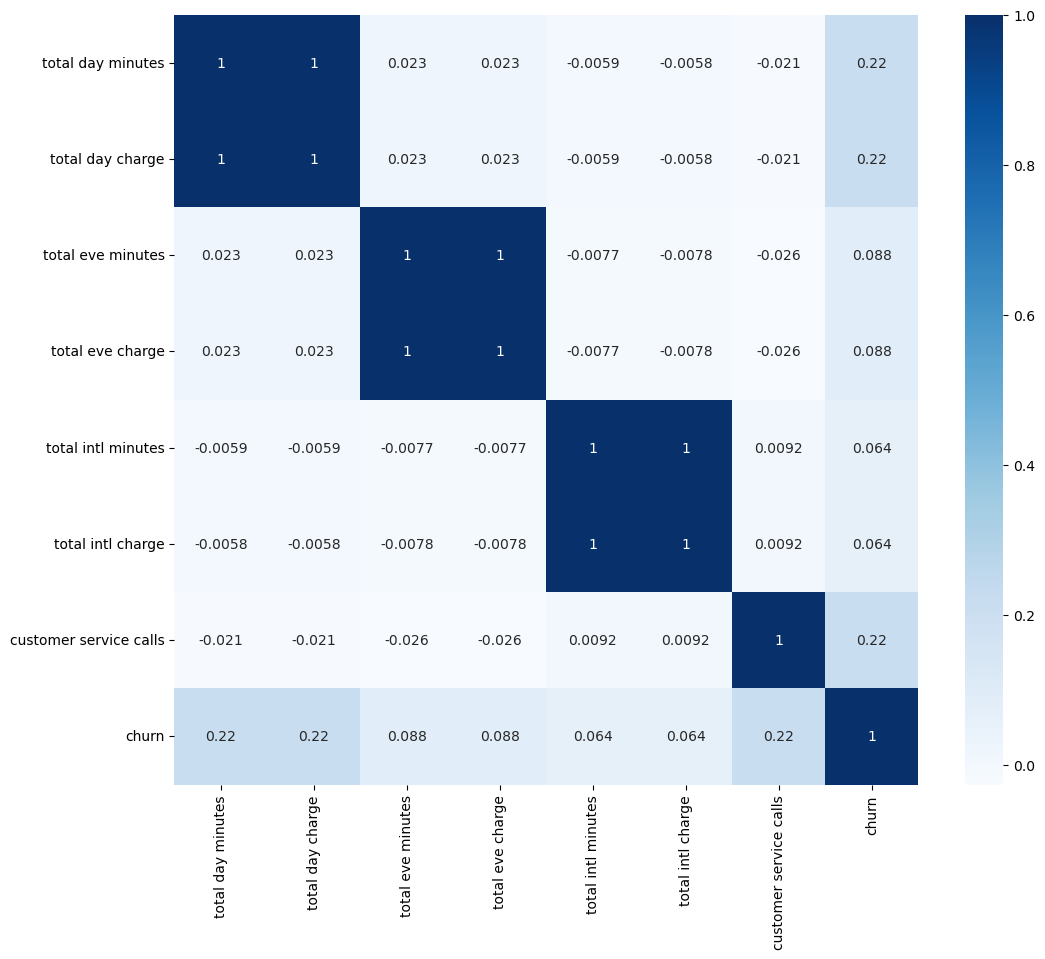

In [30]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_most, annot=True, cmap=plt.cm.Blues)
plt.show()

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [31]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [32]:
train_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,0
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,0
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,0
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,0
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,0


In [33]:
train_df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [34]:
train_df["voice mail plan"].unique()

array(['no', 'yes'], dtype=object)

In [35]:
train_df["area code"].unique()

array([415, 510, 408], dtype=int64)

In [36]:
train_df["state"].unique()

array(['NE', 'WI', 'NJ', 'NV', 'HI', 'NM', 'MO', 'MI', 'SD', 'WY', 'GA',
       'WV', 'KS', 'DC', 'CT', 'TN', 'AK', 'WA', 'MS', 'CA', 'ND', 'MD',
       'AZ', 'RI', 'SC', 'AL', 'MA', 'ME', 'AR', 'VA', 'FL', 'NY', 'DE',
       'NH', 'MN', 'KY', 'NC', 'OK', 'OR', 'ID', 'IN', 'LA', 'UT', 'PA',
       'TX', 'OH', 'MT', 'IA', 'VT', 'IL', 'CO'], dtype=object)

In [37]:
categorical_features = ["area code", "state"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]
numeric_features = list(
    set(train_df.columns)
    - set(["churn"])
    - set(binary_features)
    - set(categorical_features)
    - set(drop_features)
)

In [38]:
numeric_features

['total eve calls',
 'account length',
 'total eve charge',
 'customer service calls',
 'total intl calls',
 'total eve minutes',
 'total intl minutes',
 'total intl charge',
 'total day minutes',
 'total night minutes',
 'total day calls',
 'total night charge',
 'number vmail messages',
 'total night calls',
 'total day charge']

In [39]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ("drop", drop_features),
)

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [40]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['total eve calls', 'account length',
                                  'total eve charge', 'customer service calls',
                                  'total intl calls', 'total eve minutes',
                                  'total intl minutes', 'total intl charge',
                                  'total day minutes', 'total night minutes',
                                  'total day calls', 'total night charge',
                                  'number vmail messages', 'total night calls',
                                  'total day charge']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary'),
                                 ['international plan', 'voice mail plan']),
                                ('onehotencoder-2',
                                 OneHotEncoder(handle_unknown='ignore',
                    

In [41]:
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(drop='if_binary'),
 'onehotencoder-2': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'drop': 'drop'}

In [42]:
other_columns = (
    numeric_features
    + binary_features
    + list(
        preprocessor.named_transformers_["onehotencoder-2"].get_feature_names_out(
            categorical_features
        )
    )
)

In [43]:
X_train_enc = pd.DataFrame(preprocessor.transform(X_train), index=X_train.index, columns=other_columns)

In [44]:
X_train_enc.head()

,total eve calls,account length,total eve charge,customer service calls,total intl calls,total eve minutes,total intl minutes,total intl charge,total day minutes,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
1402,-1.156734,-0.767893,0.069926,-0.415269,-0.200722,0.069871,-1.645501,-1.644994,0.618769,1.088667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1855,-1.207278,-0.843585,-1.166291,0.337507,0.198158,-1.167277,0.227019,0.222249,-1.293778,-2.162302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,0.157417,0.544113,-2.211244,0.337507,-0.200722,-2.210130,1.919489,1.916105,-0.609809,0.369287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1483,0.258506,0.165650,-0.755774,-0.415269,-0.599603,-0.754894,-0.097071,-0.097850,0.998345,1.597736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,-0.246937,0.115188,1.196515,0.337507,1.793679,1.195994,0.407069,0.408973,-0.994886,0.793839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

In [45]:
area_code_columns = X_train_enc.columns[X_train_enc.columns.str.startswith("area code")]

In [46]:
area_code_columns

Index(['area code_408', 'area code_415', 'area code_510'], dtype='object')

In [47]:
X_train_enc.loc[X_train["area code"] == 408][area_code_columns].iloc[0].values

array([1., 0., 0.])

In [48]:
X_train_enc.loc[X_train["area code"] == 415][area_code_columns].iloc[0].values

array([0., 1., 0.])

In [49]:
X_train_enc.loc[X_train["area code"] == 510][area_code_columns].iloc[0].values

array([0., 0., 1.])

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [50]:
dummy = DummyClassifier()

In [51]:
scores = ['accuracy','precision','recall','f1']

In [57]:
for score in scores:
    print("%-9s: %.2f" %(score, cross_val_score(dummy, X_train, y_train, scoring=score).mean()))

accuracy : 0.85
precision: 0.00
recall   : 0.00
f1       : 0.00


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [58]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

In [59]:
pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.333808,0.044973,0.869379,0.864416
1,0.352801,0.023984,0.852248,0.868167
2,0.208881,0.035985,0.850107,0.867095
3,0.184897,0.030977,0.869099,0.863953
4,0.226871,0.026989,0.839056,0.868773


<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [60]:
pipe_balanced = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,class_weight='balanced'))

In [61]:
pd.DataFrame(cross_validate(pipe_balanced, X_train, y_train, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.320814,0.058965,0.785867,0.769561
1,0.263855,0.037973,0.768737,0.771168
2,0.251856,0.036985,0.764454,0.774384
3,0.236864,0.029982,0.751073,0.779325
4,0.259850,0.026991,0.733906,0.786824


<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [62]:
param_grid = {"logisticregression__C": 2.0 ** np.arange(-4, 4),
              "logisticregression__class_weight": [None, "balanced"],}

In [63]:
search = GridSearchCV(
    pipe,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)

In [64]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['total '
                                                                          'eve '
                                                                          'calls',
                                                                          'account '
                                                                          'length',
                                                                          'total '
                                                                          'eve '
                                                                          'charge',
                                                                          'customer '
       

In [65]:
grid_results_df = pd.DataFrame(search.cv_results_)[ 
    ["mean_test_score",
     "mean_train_score",
     "param_logisticregression__C",
     "param_logisticregression__class_weight",
     "rank_test_score",]]
grid_results_df = grid_results_df.sort_values(by="mean_test_score", ascending=False)
grid_results_df

,mean_test_score,mean_train_score,param_logisticregression__C,param_logisticregression__class_weight,rank_test_score
1,0.481077,0.496341,0.0625,balanced,1
3,0.477458,0.503381,0.125,balanced,2
5,0.475169,0.507852,0.25,balanced,3
7,0.469676,0.513824,0.5,balanced,4
9,0.467027,0.512418,1.0,balanced,5
11,0.465481,0.512885,2.0,balanced,6
15,0.461991,0.513988,8.0,balanced,7
13,0.461813,0.514124,4.0,balanced,8
14,0.312894,0.371034,8.0,None,9
12,0.309597,0.372006,4.0,None,10


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

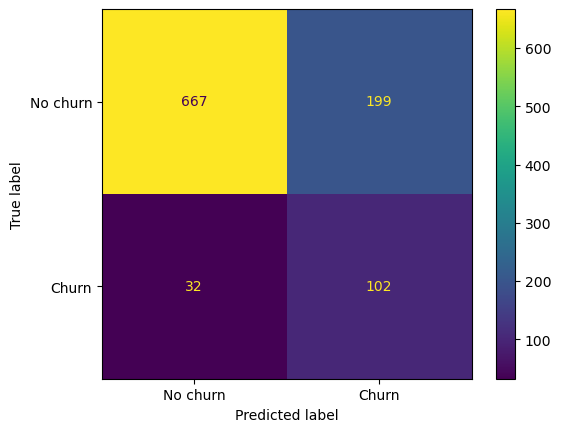

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay.from_estimator(search, X_test, y_test, display_labels=["No churn", "Churn"])

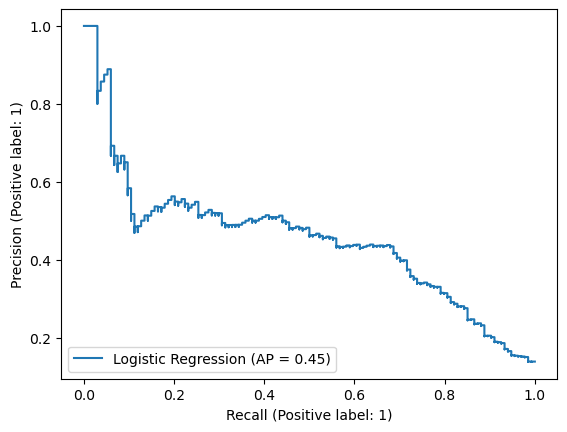

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(search, X_test, y_test, name="Logistic Regression")

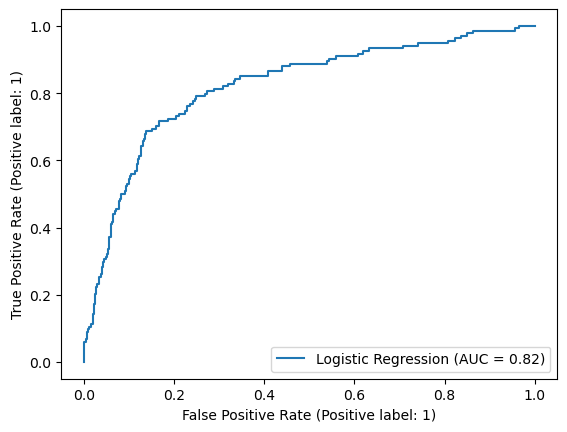

In [70]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(search, X_test, y_test, name="Logistic Regression")

In [73]:
from sklearn.metrics import classification_report
# print(classification_report(y_test,pipe.predict(X_test),target_names=[True,False]))

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [74]:
from sklearn.datasets import fetch_california_housing
housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [75]:
train_df,test_df = train_test_split(housing_df,test_size=0.2,random_state=123)

In [76]:
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9950,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875
3547,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715
4448,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917
6984,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197
4432,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9950 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


In [78]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


In [79]:
X_train = train_df.drop(columns=["MedHouseVal"])
y_train = train_df["MedHouseVal"]
X_test = test_df.drop(columns=["MedHouseVal"])
y_test = test_df["MedHouseVal"]

In [80]:
preprocessor = StandardScaler()

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [81]:
dummy = DummyRegressor()

In [82]:
pd.DataFrame(cross_validate(dummy,X_train,y_train,return_train_score = True))

,fit_time,score_time,test_score,train_score
0,0.010991,0.002996,-0.000023,0.0
1,0.007997,0.001997,-0.000576,0.0
2,0.004997,0.003000,-0.000061,0.0
3,0.005996,0.001999,-0.000015,0.0
4,0.005005,0.001999,-0.000058,0.0


<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [84]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [90]:
def scores_metrics(models,preprocessor,scoring='f1'):
    result_df = {}
    for (name, model) in models.items():
        pipeline=make_pipeline(preprocessor, model)
        scores=cross_validate(pipeline, X_train, y_train, return_train_score=True, scoring=scoring)
        df = pd.DataFrame(scores)
        result_df[name] = df.mean()
    return pd.DataFrame(result_df)

In [91]:
scores_metrics(models, preprocessor, scoring=score_types_reg)

,Ridge,Random Forest
fit_time,0.038977,38.809285
score_time,0.022946,0.414396
test_neg_mean_squared_error,-0.683433,-0.263782
train_neg_mean_squared_error,-0.524369,-0.036901
test_neg_root_mean_squared_error,-0.810381,-0.513516
train_neg_root_mean_squared_error,-0.724132,-0.192091
test_neg_mean_absolute_error,-0.535444,-0.334909
train_neg_mean_absolute_error,-0.531388,-0.125141
test_r2,0.481744,0.801740
train_r2,0.606300,0.972292


<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [92]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [93]:
pipe = make_pipeline(StandardScaler(), Ridge())

random_search_ridge = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring=mape_scorer,
    random_state=123,)
random_search_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000277DF980C40>},
                   random_state=123,
                   scoring=make_scorer(mape, greater_is_better=False),
                   verbose=1)

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [95]:
print("Random Search best hyperparameters: %s" % (random_search_ridge.best_params_))
print("Random Search best model score: %0.3f" % (random_search_ridge.best_score_))
print(
    "Train score on the full train set: %0.3f"
    % (random_search_ridge.score(X_train, y_train))
     )
print(
    "Test score on the full test set: %0.3f"
    % (random_search_ridge.score(X_test, y_test))
     )

Random Search best hyperparameters: {'ridge__alpha': 26.789982776216593}
Random Search best model score: -31.887
Train score on the full train set: -31.835
Test score on the full test set: -31.084


<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [94]:
df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": random_search_ridge.best_estimator_.named_steps["ridge"].coef_,
    }
)
df.sort_values("coefficients")

,features,coefficients
6,Latitude,-0.870521
7,Longitude,-0.835697
2,AveRooms,-0.276697
5,AveOccup,-0.041684
4,Population,-0.006641
1,HouseAge,0.117318
3,AveBedrms,0.311874
0,MedInc,0.834711


<br><br>